In [175]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [93]:
clamis=pd.read_csv('/content/drive/MyDrive/121_finial/Train_Claim.csv',na_values=['?','#',','])

In [94]:
demo=pd.read_csv('/content/drive/MyDrive/121_finial/Train_Demographics.csv',na_values=['?','#',','])

In [95]:
poli=pd.read_csv('/content/drive/MyDrive/121_finial/Train_Policy.csv',na_values=['?','#',','])

In [96]:
#vech=pd.read_csv('/content/drive/MyDrive/121_finial/Train_Vehicle.csv',na_values=['?','#',','])

In [97]:
vechid=pd.read_csv('/content/drive/MyDrive/121_finial/train_vechid.csv',na_values=['?','#',','])

In [98]:
vechid

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust13038,VehicleID,Vehicle30212
2,Cust1801,VehicleID,Vehicle24096
3,Cust14947,VehicleID,Vehicle15216
4,Cust19144,VehicleID,Vehicle29018
...,...,...,...
28831,Cust2970,VehicleID,Vehicle19228
28832,Cust19731,VehicleID,Vehicle12644
28833,Cust25338,VehicleID,Vehicle28831
28834,Cust7637,VehicleID,Vehicle12870


In [99]:
vechid['vech_id']=vechid['VehicleAttributeDetails']
vechid.drop(['VehicleAttributeDetails','VehicleAttribute'],axis=1,inplace=True)
vechid

,CustomerID,vech_id
0,Cust20179,Vehicle8898
1,Cust13038,Vehicle30212
2,Cust1801,Vehicle24096
3,Cust14947,Vehicle15216
4,Cust19144,Vehicle29018
...,...,...
28831,Cust2970,Vehicle19228
28832,Cust19731,Vehicle12644
28833,Cust25338,Vehicle28831
28834,Cust7637,Vehicle12870


In [100]:
yom=pd.read_csv('/content/drive/MyDrive/121_finial/train_yom.csv',na_values=['?','#',','])

In [101]:
yom

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust21334,VehicleYOM,1996
1,Cust26634,VehicleYOM,1999
2,Cust21432,VehicleYOM,2002
3,Cust22845,VehicleYOM,2000
4,Cust30659,VehicleYOM,2003
...,...,...,...
28831,Cust13546,VehicleYOM,2011
28832,Cust27958,VehicleYOM,2015
28833,Cust27100,VehicleYOM,2011
28834,Cust11761,VehicleYOM,1997


In [102]:
yom['vech_yom']=yom['VehicleAttributeDetails']
yom.drop(['VehicleAttribute','VehicleAttributeDetails'],axis=1,inplace=True)
yom

,CustomerID,vech_yom
0,Cust21334,1996
1,Cust26634,1999
2,Cust21432,2002
3,Cust22845,2000
4,Cust30659,2003
...,...,...
28831,Cust13546,2011
28832,Cust27958,2015
28833,Cust27100,2011
28834,Cust11761,1997


In [103]:
make=pd.read_csv('/content/drive/MyDrive/121_finial/train_vechmake.csv',na_values=['?','#',','])

In [104]:
make['vech_make_company']=make['VehicleAttributeDetails']


In [105]:
make

,CustomerID,VehicleAttribute,VehicleAttributeDetails,vech_make_company
0,Cust33335,VehicleMake,Toyota,Toyota
1,Cust20624,VehicleMake,Chevrolet,Chevrolet
2,Cust9006,VehicleMake,Accura,Accura
3,Cust18447,VehicleMake,Honda,Honda
4,Cust17021,VehicleMake,BMW,BMW
...,...,...,...,...
28831,Cust27692,VehicleMake,Ford,Ford
28832,Cust2507,VehicleMake,Saab,Saab
28833,Cust17851,VehicleMake,Chevrolet,Chevrolet
28834,Cust11205,VehicleMake,Chevrolet,Chevrolet


In [106]:
make.drop(['VehicleAttribute','VehicleAttributeDetails'],axis=1,inplace=True)

In [107]:
made=pd.read_csv('/content/drive/MyDrive/121_finial/train_vech_made.csv',na_values=['?','#',','])

In [108]:
made

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust21384,VehicleModel,Malibu
1,Cust27118,VehicleModel,Neon
2,Cust30237,VehicleModel,RAM
3,Cust23684,VehicleModel,Neon
4,Cust35737,VehicleModel,Wrangler
...,...,...,...
28831,Cust38183,VehicleModel,95
28832,Cust27059,VehicleModel,Maxima
28833,Cust4899,VehicleModel,92x
28834,Cust7088,VehicleModel,F150


In [109]:
made['vech_made_company']=made['VehicleAttributeDetails']
made.drop(['VehicleAttributeDetails','VehicleAttribute'],axis=1,inplace=True)
made

,CustomerID,vech_made_company
0,Cust21384,Malibu
1,Cust27118,Neon
2,Cust30237,RAM
3,Cust23684,Neon
4,Cust35737,Wrangler
...,...,...
28831,Cust38183,95
28832,Cust27059,Maxima
28833,Cust4899,92x
28834,Cust7088,F150


In [110]:
target=pd.read_csv('/content/drive/MyDrive/121_finial/Traindata_with_Target.csv',na_values=['?','#',','])

In [111]:
target

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y
...,...,...
28831,Cust9773,N
28832,Cust38439,N
28833,Cust38444,N
28834,Cust26466,N


In [112]:
target['ReportedFraud'] = target['ReportedFraud'].apply(lambda x: 1 if x == "Y" else 0)


In [113]:
target

,CustomerID,ReportedFraud
0,Cust20065,0
1,Cust37589,0
2,Cust24312,0
3,Cust5493,1
4,Cust7704,1
...,...,...
28831,Cust9773,0
28832,Cust38439,0
28833,Cust38444,0
28834,Cust26466,0


In [114]:
print(clamis.shape)
print(demo.shape)
print(poli.shape)
print(target.shape)
print(vechid.shape)
print(yom.shape)
print(make.shape)
print(made.shape)

(28836, 19)
(28836, 10)
(28836, 10)
(28836, 2)
(28836, 2)
(28836, 2)
(28836, 2)
(28836, 2)


In [115]:
vech.columns

Index(['CustomerID', 'VehicleAttribute', 'VehicleAttributeDetails'], dtype='object')

In [116]:
df1=pd.merge(clamis,vechid,on='CustomerID',how='left')

In [117]:
df2=pd.merge(df1,yom,on='CustomerID',how='left')

In [118]:
df3=pd.merge(df2,make,on='CustomerID',how='left')

In [119]:
df4=pd.merge(df3,made,on='CustomerID',how='left')

In [120]:
df5=pd.merge(df4,demo,on='CustomerID',how='left')

In [121]:
df6=pd.merge(df5,poli,on='CustomerID',how='left')

In [143]:
train=pd.merge(df6,target,on='CustomerID',how='left')

In [144]:
train

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,0
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,119122,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,0
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,119123,167,2001-02-12,State3,500/1000,617,1373.38,0,wife,0
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,119124,190,2005-04-11,State2,500/1000,722,1337.60,0,own-child,0
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,119125,115,1996-10-25,State2,100/300,500,1353.73,4279863,unmarried,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,NaN,Trivial Damage,Police,State9,City4,Location 1890,3,...,119114,321,1998-04-18,State1,500/1000,655,1276.01,0,unmarried,0
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,...,119115,237,2004-09-07,State2,100/300,1089,1273.38,0,unmarried,0
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,...,119117,392,1998-09-10,State3,250/500,787,1380.92,3448735,own-child,0
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,...,119118,391,1998-08-10,State3,250/500,780,1389.29,3364301,not-in-family,0


In [145]:
train.isna().sum(axis=0)

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                      0
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                         0
PoliceReport                   9805
AmountOfTotalClaim                0
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
vech_id                           0
vech_yom                          0
vech_make_company                 0
vech_made_company                 0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation           

In [146]:
train.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'vech_id', 'vech_yom', 'vech_make_company',
       'vech_made_company', 'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'ReportedFraud'],
      dtype='object')

In [147]:
train.drop(['DateOfIncident','IncidentAddress','InsuredZipCode','InsuredHobbies','InsurancePolicyNumber','IncidentState','IncidentCity','InsuredRelationship','InsuredGender','DateOfPolicyCoverage'],axis=1,inplace=True)

In [148]:
train.shape

(28836, 32)

In [149]:
train.drop(['CustomerID'],axis=1,inplace=True)

In [150]:
train

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,CapitalGains,CapitalLoss,Country,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,ReportedFraud
0,Multi-vehicle Collision,Side Collision,Total Loss,Police,17,3,NaN,1,0,NaN,...,56700,-48500,India,49,State1,100/300,1000,1632.73,0,0
1,Multi-vehicle Collision,Side Collision,Total Loss,Police,10,3,YES,2,1,YES,...,70600,-48500,India,114,State1,100/300,1000,1255.19,0,0
2,Single Vehicle Collision,Side Collision,Minor Damage,Other,22,1,YES,2,3,NO,...,66400,-63700,India,167,State3,500/1000,617,1373.38,0,0
3,Single Vehicle Collision,Side Collision,Minor Damage,Other,22,1,YES,2,3,NO,...,47900,-73400,India,190,State2,500/1000,722,1337.60,0,0
4,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,10,1,NO,2,1,YES,...,0,-41500,India,115,State2,100/300,500,1353.73,4279863,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Vehicle Theft,NaN,Trivial Damage,Police,3,1,NO,0,3,NaN,...,0,0,India,321,State1,500/1000,655,1276.01,0,0
28832,Single Vehicle Collision,Front Collision,Minor Damage,Fire,17,1,YES,0,2,YES,...,0,-28800,India,237,State2,100/300,1089,1273.38,0,0
28833,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,1,1,YES,2,0,YES,...,63100,-43800,India,392,State3,250/500,787,1380.92,3448735,0
28834,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,1,1,NaN,2,0,YES,...,67400,-43800,India,391,State3,250/500,780,1389.29,3364301,0


In [151]:
train.columns

Index(['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'vech_id', 'vech_yom', 'vech_make_company',
       'vech_made_company', 'InsuredAge', 'InsuredEducationLevel',
       'InsuredOccupation', 'CapitalGains', 'CapitalLoss', 'Country',
       'CustomerLoyaltyPeriod', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'ReportedFraud'],
      dtype='object')

In [152]:
train['ReportedFraud'].value_counts(normalize=True)#categorical

0    0.730025
1    0.269975
Name: ReportedFraud, dtype: float64

In [153]:
train.drop(['vech_id'],axis=1,inplace=True)

In [154]:
train.drop(['Country'],axis=1,inplace=True)

In [155]:
train.dtypes

TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentTime                    int64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                      object
PoliceReport                   object
AmountOfTotalClaim             object
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
vech_yom                        int64
vech_make_company              object
vech_made_company              object
InsuredAge                      int64
InsuredEducationLevel          object
InsuredOccupation              object
CapitalGains                    int64
CapitalLoss                     int64
CustomerLoyaltyPeriod           int64
InsurancePolicyState           object
Policy_CombinedSingleLimit     object
Policy_Deductible               int64
PolicyAnnual

In [160]:
cat_cols=['TypeOfIncident','TypeOfCollission','SeverityOfIncident','AuthoritiesContacted','IncidentTime','NumberOfVehicles','PropertyDamage', 'BodilyInjuries','Witnesses', 'PoliceReport','vech_yom', 'vech_make_company','vech_made_company','InsuredEducationLevel','InsuredOccupation','InsurancePolicyState','Policy_CombinedSingleLimit','ReportedFraud']

In [157]:
num_cols=['AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim','AmountOfVehicleDamage','InsuredAge','CapitalGains', 'CapitalLoss','CustomerLoyaltyPeriod','Policy_Deductible','PolicyAnnualPremium','UmbrellaLimit']

In [161]:
train[cat_cols]=train[cat_cols].astype('category')

In [162]:
train.dtypes

TypeOfIncident                category
TypeOfCollission              category
SeverityOfIncident            category
AuthoritiesContacted          category
IncidentTime                  category
NumberOfVehicles              category
PropertyDamage                category
BodilyInjuries                category
Witnesses                     category
PoliceReport                  category
AmountOfTotalClaim              object
AmountOfInjuryClaim              int64
AmountOfPropertyClaim            int64
AmountOfVehicleDamage            int64
vech_yom                      category
vech_make_company             category
vech_made_company             category
InsuredAge                       int64
InsuredEducationLevel         category
InsuredOccupation             category
CapitalGains                     int64
CapitalLoss                      int64
CustomerLoyaltyPeriod            int64
InsurancePolicyState          category
Policy_CombinedSingleLimit    category
Policy_Deductible        

In [166]:
train['AmountOfTotalClaim'].value_counts()

MISSEDDATA    50
6820          12
5400           8
60600          8
55000          7
              ..
37863          1
33412          1
62879          1
54465          1
55830          1
Name: AmountOfTotalClaim, Length: 21976, dtype: int64

In [165]:
train['AmountOfTotalClaim']=train['AmountOfTotalClaim'].astype('float')

ValueError: ignored

In [167]:
train.drop(['AmountOfTotalClaim'],axis=1,inplace=True)

In [168]:
train.dtypes

TypeOfIncident                category
TypeOfCollission              category
SeverityOfIncident            category
AuthoritiesContacted          category
IncidentTime                  category
NumberOfVehicles              category
PropertyDamage                category
BodilyInjuries                category
Witnesses                     category
PoliceReport                  category
AmountOfInjuryClaim              int64
AmountOfPropertyClaim            int64
AmountOfVehicleDamage            int64
vech_yom                      category
vech_make_company             category
vech_made_company             category
InsuredAge                       int64
InsuredEducationLevel         category
InsuredOccupation             category
CapitalGains                     int64
CapitalLoss                      int64
CustomerLoyaltyPeriod            int64
InsurancePolicyState          category
Policy_CombinedSingleLimit    category
Policy_Deductible                int64
PolicyAnnualPremium      

In [171]:
x= train.drop('ReportedFraud',axis=1)

In [172]:
y=train['ReportedFraud']

In [174]:
x.isna().sum(axis=0)

TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentTime                      0
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                         0
PoliceReport                   9805
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
vech_yom                          0
vech_make_company                 0
vech_made_company                 0
InsuredAge                        0
InsuredEducationLevel             0
InsuredOccupation                 0
CapitalGains                      0
CapitalLoss                       0
CustomerLoyaltyPeriod             0
InsurancePolicyState              0
Policy_CombinedSingleLimit        0
Policy_Deductible                 0
PolicyAnnualPremium               0
UmbrellaLimit                     0
dtype: int64

In [176]:
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify=y, random_state=1234)

In [179]:
x_train_cat_cols=x_train.select_dtypes(['category']).columns

In [180]:
x_test_cat_cols=x_test.select_dtypes(['category']).columns

In [181]:
x_train_num_cols=x_train.select_dtypes(['int','float']).columns

In [182]:
x_test_num_cols=x_test.select_dtypes(['int','float']).columns

In [184]:
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')

In [185]:
imputer = imputer.fit(x_train[x_train_num_cols])
x_train[x_train_num_cols] = imputer.transform(x_train[x_train_num_cols])
x_test[x_test_num_cols] = imputer.transform(x_test[x_test_num_cols])


In [187]:
imputer = SimpleImputer(strategy='most_frequent')
imputer = imputer.fit(x_train[x_train_cat_cols])
x_train[x_train_cat_cols] = imputer.transform(x_train[x_train_cat_cols])
x_test[x_test_cat_cols] = imputer.transform(x_test[x_test_cat_cols])

In [189]:
x_train.isna().sum(axis=0)

TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
vech_yom                      0
vech_make_company             0
vech_made_company             0
InsuredAge                    0
InsuredEducationLevel         0
InsuredOccupation             0
CapitalGains                  0
CapitalLoss                   0
CustomerLoyaltyPeriod         0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
dtype: int64

In [190]:
scaler = StandardScaler()
scaler.fit(x_train[x_train_num_cols])
x_train[x_train_num_cols]=scaler.transform(x_train[x_train_num_cols])
x_test[x_test_num_cols]=scaler.transform(x_test[x_test_num_cols])

In [191]:
x_train

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,InsuredEducationLevel,InsuredOccupation,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
24088,Single Vehicle Collision,Side Collision,Minor Damage,Fire,17,2,NO,1,0,NO,...,Masters,priv-house-serv,-0.832606,0.891807,-0.092601,State3,100/300,-0.208418,0.832664,1.231612
4722,Multi-vehicle Collision,Front Collision,Total Loss,Police,3,4,NO,0,1,NO,...,JD,machine-op-inspct,-0.832606,0.891807,-0.773060,State2,100/500,-1.101605,1.145880,-0.496804
6441,Single Vehicle Collision,Side Collision,Minor Damage,Police,11,1,NO,1,2,NO,...,JD,sales,0.834135,0.891807,0.737958,State1,250/500,1.189932,-0.704049,-0.496804
24858,Multi-vehicle Collision,Front Collision,Total Loss,Police,23,3,YES,2,2,NO,...,JD,sales,-0.832606,-1.267827,-0.142635,State1,250/300,1.530368,-0.183324,-0.496804
22041,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,14,3,NO,0,3,YES,...,Associate,handlers-cleaners,-0.832606,-1.479134,-0.793073,State3,500/1000,-1.105265,0.241752,-0.496804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15609,Single Vehicle Collision,Front Collision,Total Loss,Other,4,1,NO,2,0,NO,...,College,adm-clerical,-0.832606,-0.941912,-1.113289,State2,500/300,-0.396939,0.703695,-0.496804
9126,Multi-vehicle Collision,Front Collision,Total Loss,Other,17,3,NO,0,0,NO,...,High School,tech-support,1.336688,0.891807,-1.143309,State3,100/300,-1.123568,-1.730905,-0.496804
15279,Vehicle Theft,Rear Collision,Trivial Damage,Police,2,1,NO,0,1,NO,...,High School,prof-specialty,-0.832606,-0.805816,-1.073262,State1,250/500,-1.123568,-0.247539,-0.496804
27890,Multi-vehicle Collision,Side Collision,Total Loss,Fire,3,3,NO,2,2,NO,...,Masters,adm-clerical,-0.832606,0.891807,-0.052574,State2,250/500,-1.123568,-1.784926,-0.342755


In [192]:
x_train = pd.get_dummies(columns=x_train_cat_cols, data=x_train,prefix=x_train_cat_cols, prefix_sep="_", drop_first=True)

In [193]:
x_train

,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,...,InsurancePolicyState_State2,InsurancePolicyState_State3,Policy_CombinedSingleLimit_100/300,Policy_CombinedSingleLimit_100/500,Policy_CombinedSingleLimit_250/1000,Policy_CombinedSingleLimit_250/300,Policy_CombinedSingleLimit_250/500,Policy_CombinedSingleLimit_500/1000,Policy_CombinedSingleLimit_500/300,Policy_CombinedSingleLimit_500/500
24088,0.417562,0.433059,0.966167,-0.355967,-0.832606,0.891807,-0.092601,-0.208418,0.832664,1.231612,...,0,1,1,0,0,0,0,0,0,0
4722,0.913841,0.936090,0.428834,-1.356706,-0.832606,0.891807,-0.773060,-1.101605,1.145880,-0.496804,...,1,0,0,1,0,0,0,0,0,0
6441,-0.708133,-0.707949,-0.464985,0.894958,0.834135,0.891807,0.737958,1.189932,-0.704049,-0.496804,...,0,0,0,0,0,0,1,0,0,0
24858,0.946055,-0.345348,0.765145,-0.105782,-0.832606,-1.267827,-0.142635,1.530368,-0.183324,-0.496804,...,0,0,0,0,0,1,0,0,0,0
22041,-0.031184,-0.021791,1.098353,-1.231614,-0.832606,-1.479134,-0.793073,-1.105265,0.241752,-0.496804,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15609,1.450219,-1.358258,0.350575,-0.981429,-0.832606,-0.941912,-1.113289,-0.396939,0.703695,-0.496804,...,1,0,0,0,0,0,0,0,1,0
9126,-0.864248,0.673043,0.182974,-1.231614,1.336688,0.891807,-1.143309,-1.123568,-1.730905,-0.496804,...,0,1,1,0,0,0,0,0,0,0
15279,-1.537142,-1.482246,-1.894806,-0.856336,-0.832606,-0.805816,-1.073262,-1.123568,-0.247539,-0.496804,...,0,0,0,0,0,0,1,0,0,0
27890,-0.267272,1.082455,0.281074,0.019311,-0.832606,0.891807,-0.052574,-1.123568,-1.784926,-0.342755,...,1,0,0,0,0,0,1,0,0,0


In [194]:
x_test = pd.get_dummies(columns=x_test_cat_cols, data=x_test,prefix=x_test_cat_cols, prefix_sep="_", drop_first=True)

In [195]:
x_test

,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,...,InsurancePolicyState_State2,InsurancePolicyState_State3,Policy_CombinedSingleLimit_100/300,Policy_CombinedSingleLimit_100/500,Policy_CombinedSingleLimit_250/1000,Policy_CombinedSingleLimit_250/300,Policy_CombinedSingleLimit_250/500,Policy_CombinedSingleLimit_500/1000,Policy_CombinedSingleLimit_500/300,Policy_CombinedSingleLimit_500/500
17755,-1.383505,-1.526087,-1.790056,0.269496,-0.832606,0.891807,0.407736,-1.123568,-0.670280,-0.496804,...,1,0,0,0,0,0,1,0,0,0
12781,1.490543,-0.168385,0.788201,-1.606891,-0.832606,0.891807,-1.033235,-0.208418,1.556272,-0.496804,...,0,0,0,0,0,0,1,0,0,0
6697,0.048337,0.058812,0.321312,-0.481059,0.320735,-0.705534,-0.733033,-1.123568,-0.588777,-0.496804,...,1,0,0,0,0,0,1,0,0,0
19643,0.147233,1.551006,0.749405,0.144403,0.975139,-1.146056,-0.122622,-0.338369,-1.132089,-0.496804,...,1,0,0,0,0,0,0,1,0,0
16174,-0.535348,-0.532814,-0.214691,-0.230874,1.058295,0.891807,-0.502878,-0.958841,-1.170079,-0.496804,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24654,-1.541648,-0.383252,0.112475,-1.606891,-0.832606,-1.117404,-1.633639,-0.292612,-0.097734,-0.496804,...,0,1,0,0,0,0,0,0,1,0
22669,0.874868,0.896587,-0.159766,2.270975,-0.832606,-1.042193,2.238968,1.621883,-0.296262,-0.274532,...,1,0,0,0,0,0,0,1,0,0
11963,0.683385,0.092150,-0.065324,0.644773,-0.832606,0.891807,0.407736,-0.757508,0.491067,-0.496804,...,1,0,1,0,0,0,0,0,0,0
5421,-0.025327,1.556714,0.659341,-0.105782,-0.832606,0.891807,0.097527,-1.123568,0.667861,-0.496804,...,1,0,0,0,0,0,1,0,0,0


In [196]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score

def score_model(model,x_train,x_test,y_train,y_test):
  model=model.fit(x_train,y_train)
  train_preds=model.predict(x_train)
  test_preds=model.predict(x_test)


  print(confusion_matrix(y_train,train_preds))
  print(accuracy_score(y_train,train_preds))
  print(recall_score(y_train,train_preds))
  print(precision_score(y_train,train_preds))
  print(f1_score(y_train,train_preds))

  print(confusion_matrix(y_test,test_preds))
  print(accuracy_score(y_test,test_preds))
  print(recall_score(y_test,test_preds))
  print(precision_score(y_test,test_preds))
  print(f1_score(y_test,test_preds))



  from sklearn.metrics import roc_curve, auc

  fpr, tpr, threshold = roc_curve(y_train, train_preds)
  roc_auc = auc(fpr, tpr)
  %matplotlib inline
  plt.figure()
  plt.plot([0,1],[0,1],color='navy', lw=2, linestyle='--')
  plt.plot(fpr,tpr,color='orange', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)

  plt.xlabel('FPR')
  plt.ylabel('TPR')

  plt.legend(loc="lower right")






[[14728     8]
 [ 5015   434]]
0.7511518454297745
0.07964764176913196
0.9819004524886877
0.14734340519436429
[[6305   10]
 [2197  139]]
0.7448849843948676
0.05950342465753425
0.9328859060402684
0.11187122736418512


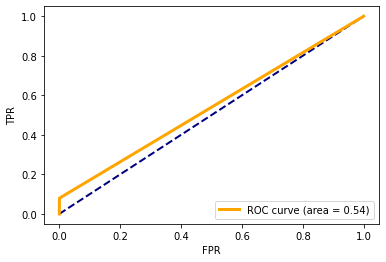

In [197]:
from sklearn.ensemble import RandomForestClassifier
rfc4=RandomForestClassifier(n_estimators=25,max_depth=8,criterion='gini')
score_model(rfc4,x_train,x_test,y_train,y_test)

In [198]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
re_x_train, re_y_train= smote.fit_resample(x_train, y_train)
#re_x_train, re_y_train= smote.fit_resample(x_train, y_train)

[[11716  3020]
 [ 2167 12569]]
0.8240024429967426
0.8529451682953312
0.8062736544999679
0.8289530090684254
[[4921 1394]
 [ 545 1791]]
0.7758640619581552
0.766695205479452
0.5623233908948194
0.6487955080601341


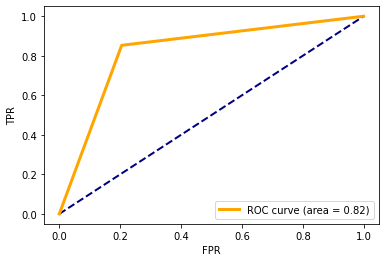

In [199]:
from sklearn.ensemble import RandomForestClassifier
rfc4=RandomForestClassifier(n_estimators=25,max_depth=8,criterion='gini')
score_model(rfc4,re_x_train,x_test,re_y_train,y_test)